<a href="https://colab.research.google.com/github/anejalakshya2005-spec/CodeAlpha_CreditScoreClassification/blob/main/CodeAlpha_CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv("/content/drive/MyDrive/Credit Score Classification Dataset.csv")

In [64]:
df.head()


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [65]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


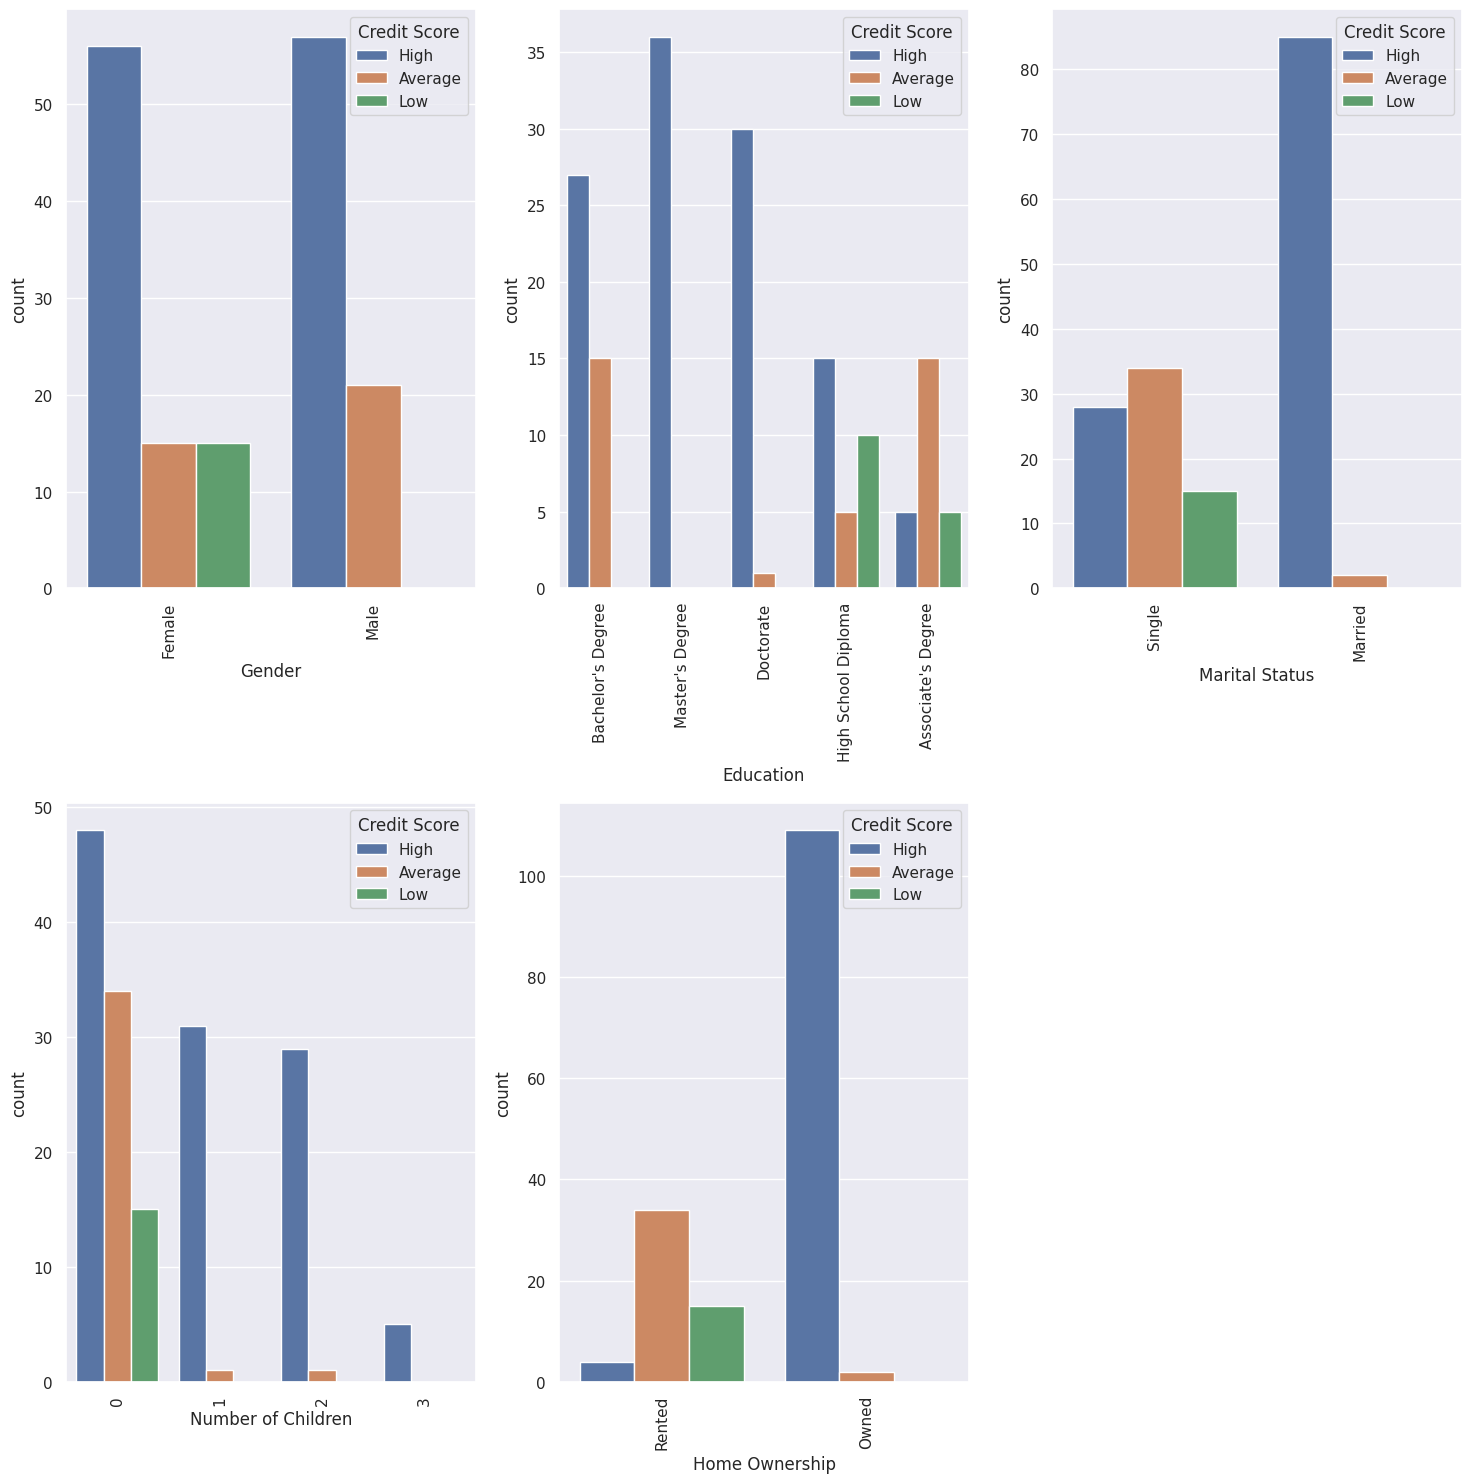

In [66]:

# list of categorical variables to plot
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Credit Score', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

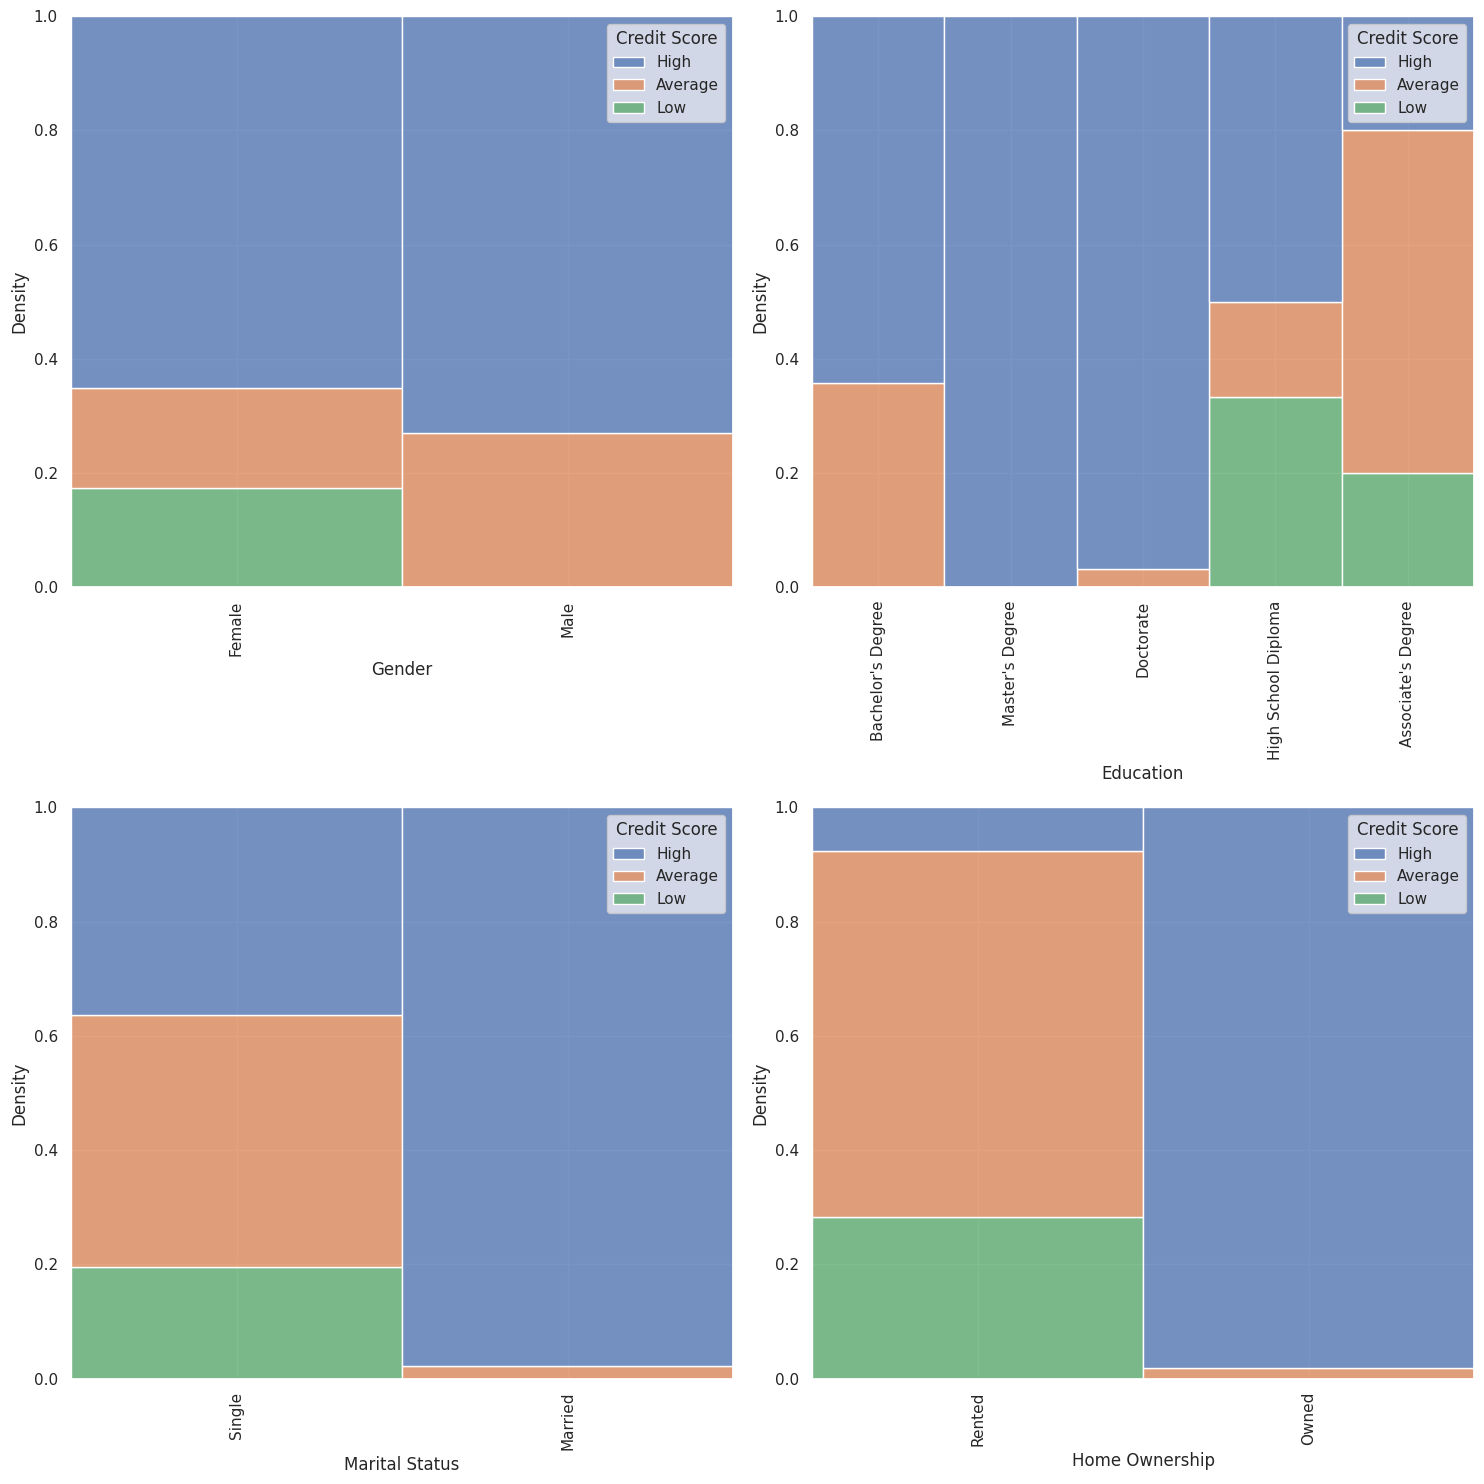

In [67]:

import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Gender', 'Education', 'Marital Status', 'Home Ownership']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Credit Score', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()



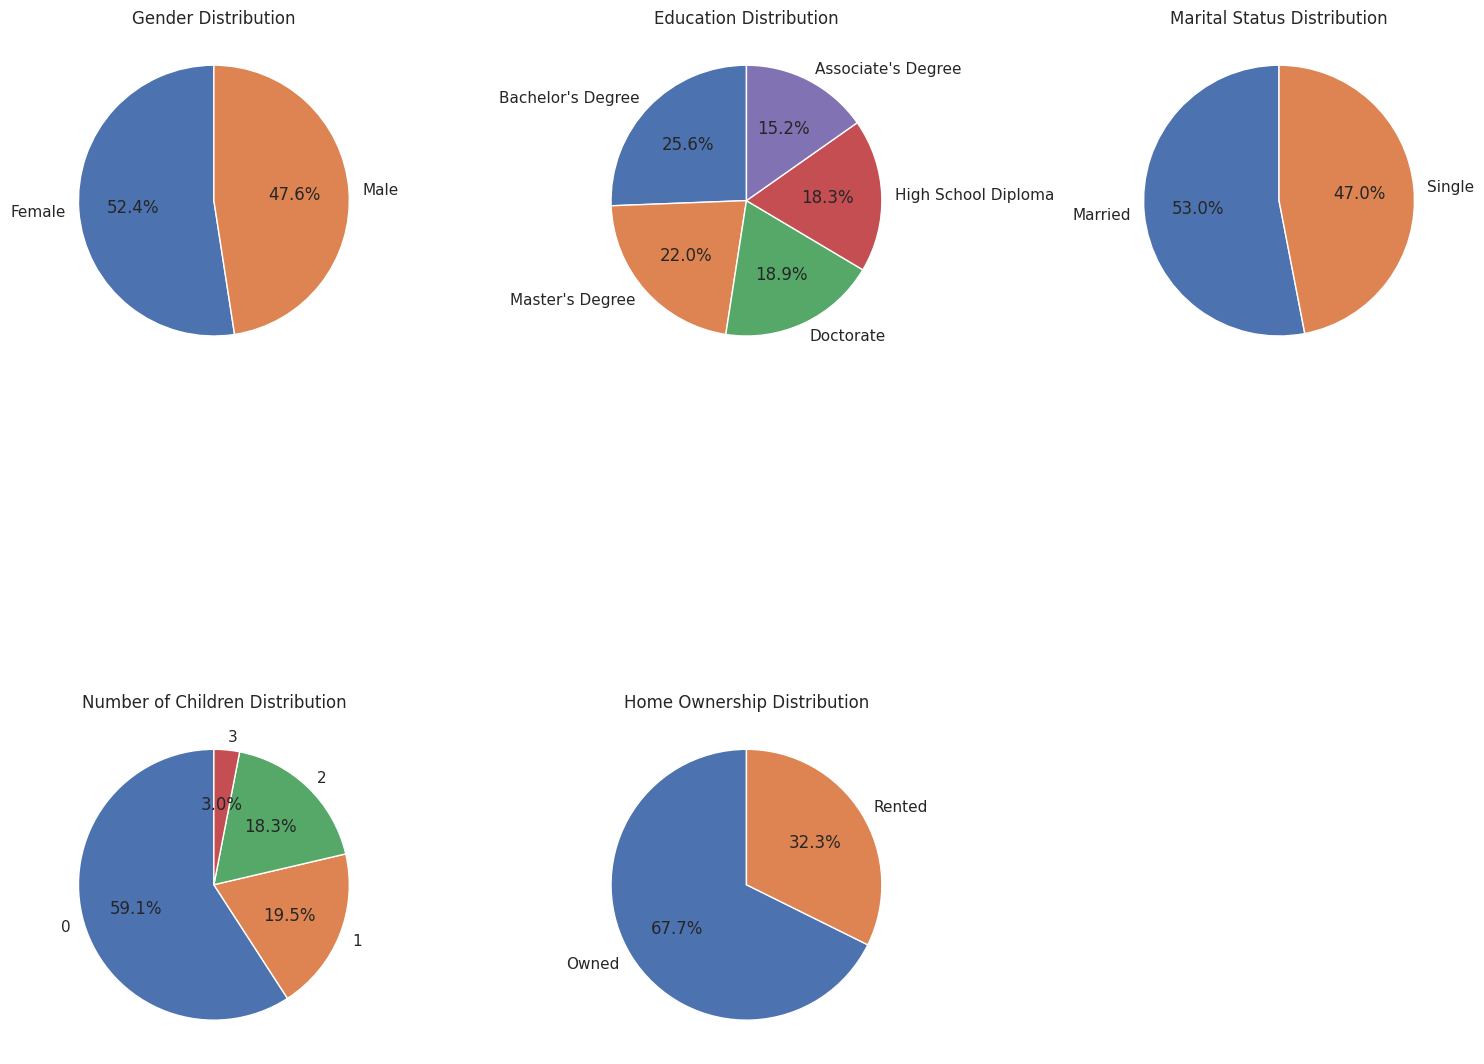

In [68]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()
fig.delaxes(axs[1][2])
# show the plot
plt.show()


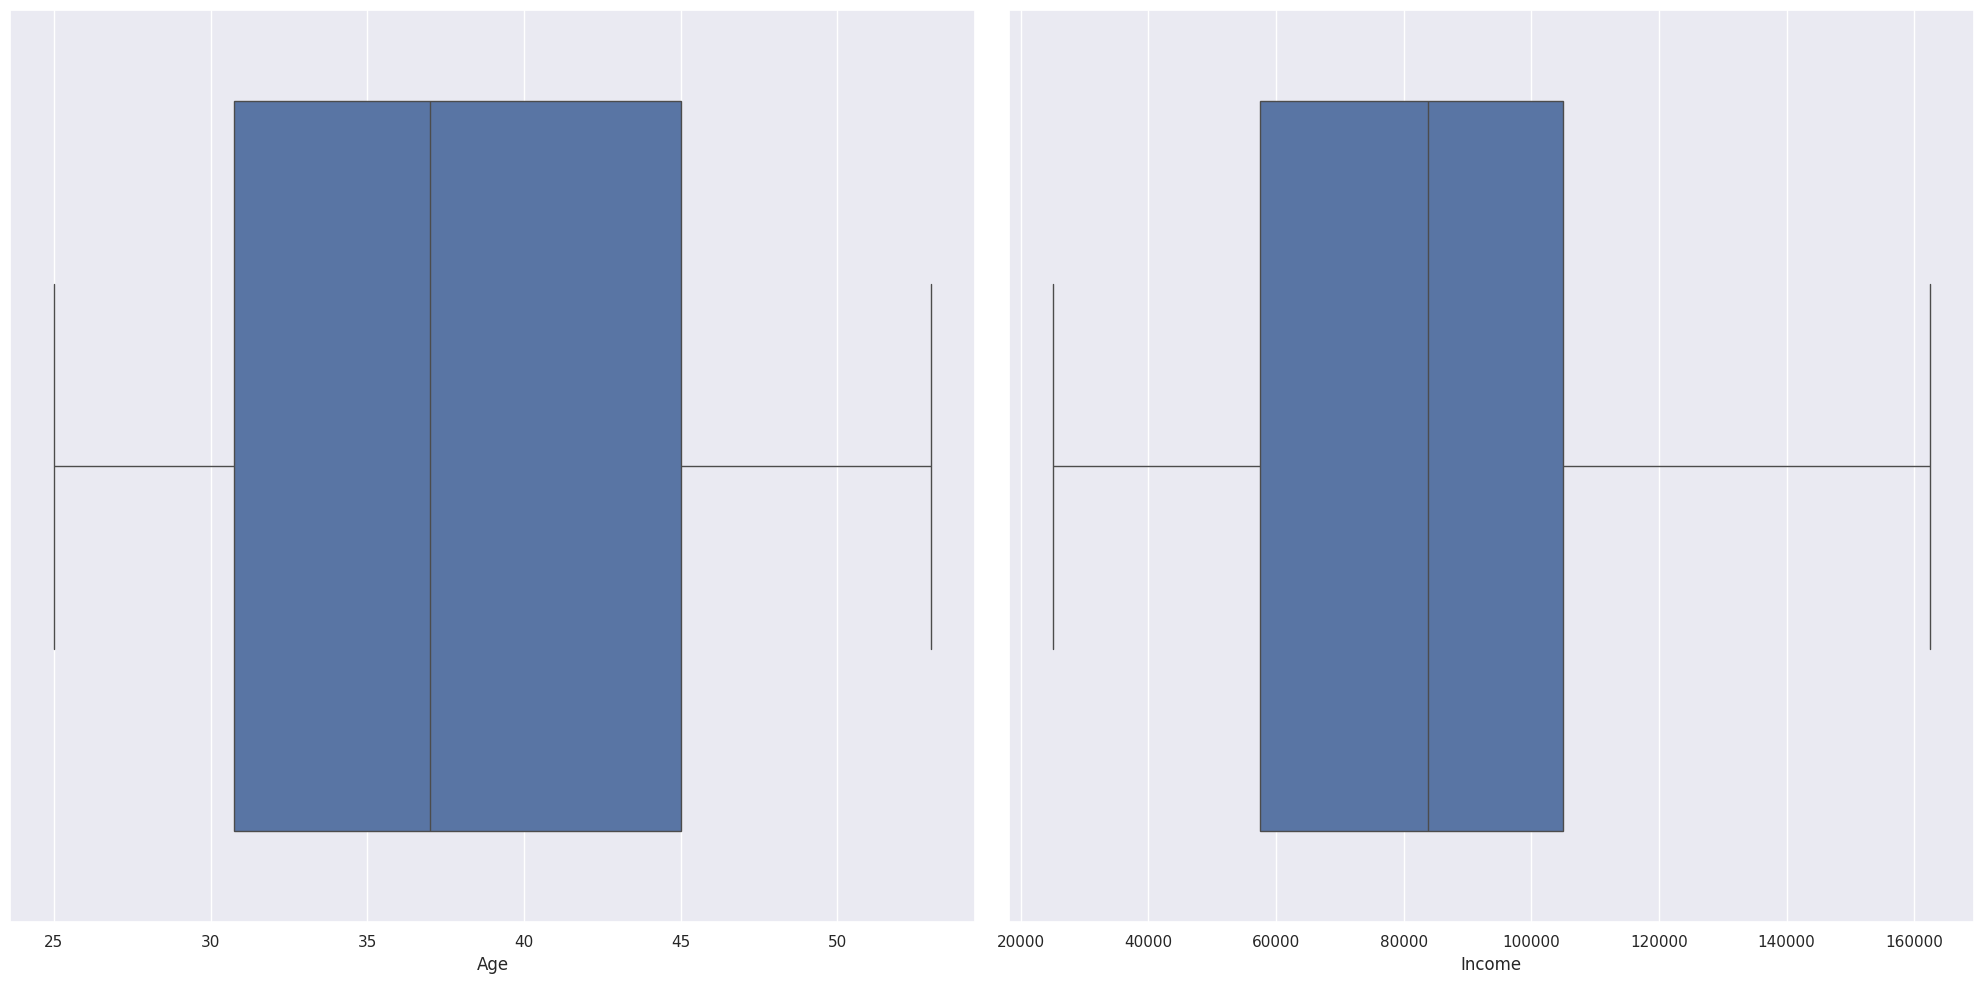

In [69]:

num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

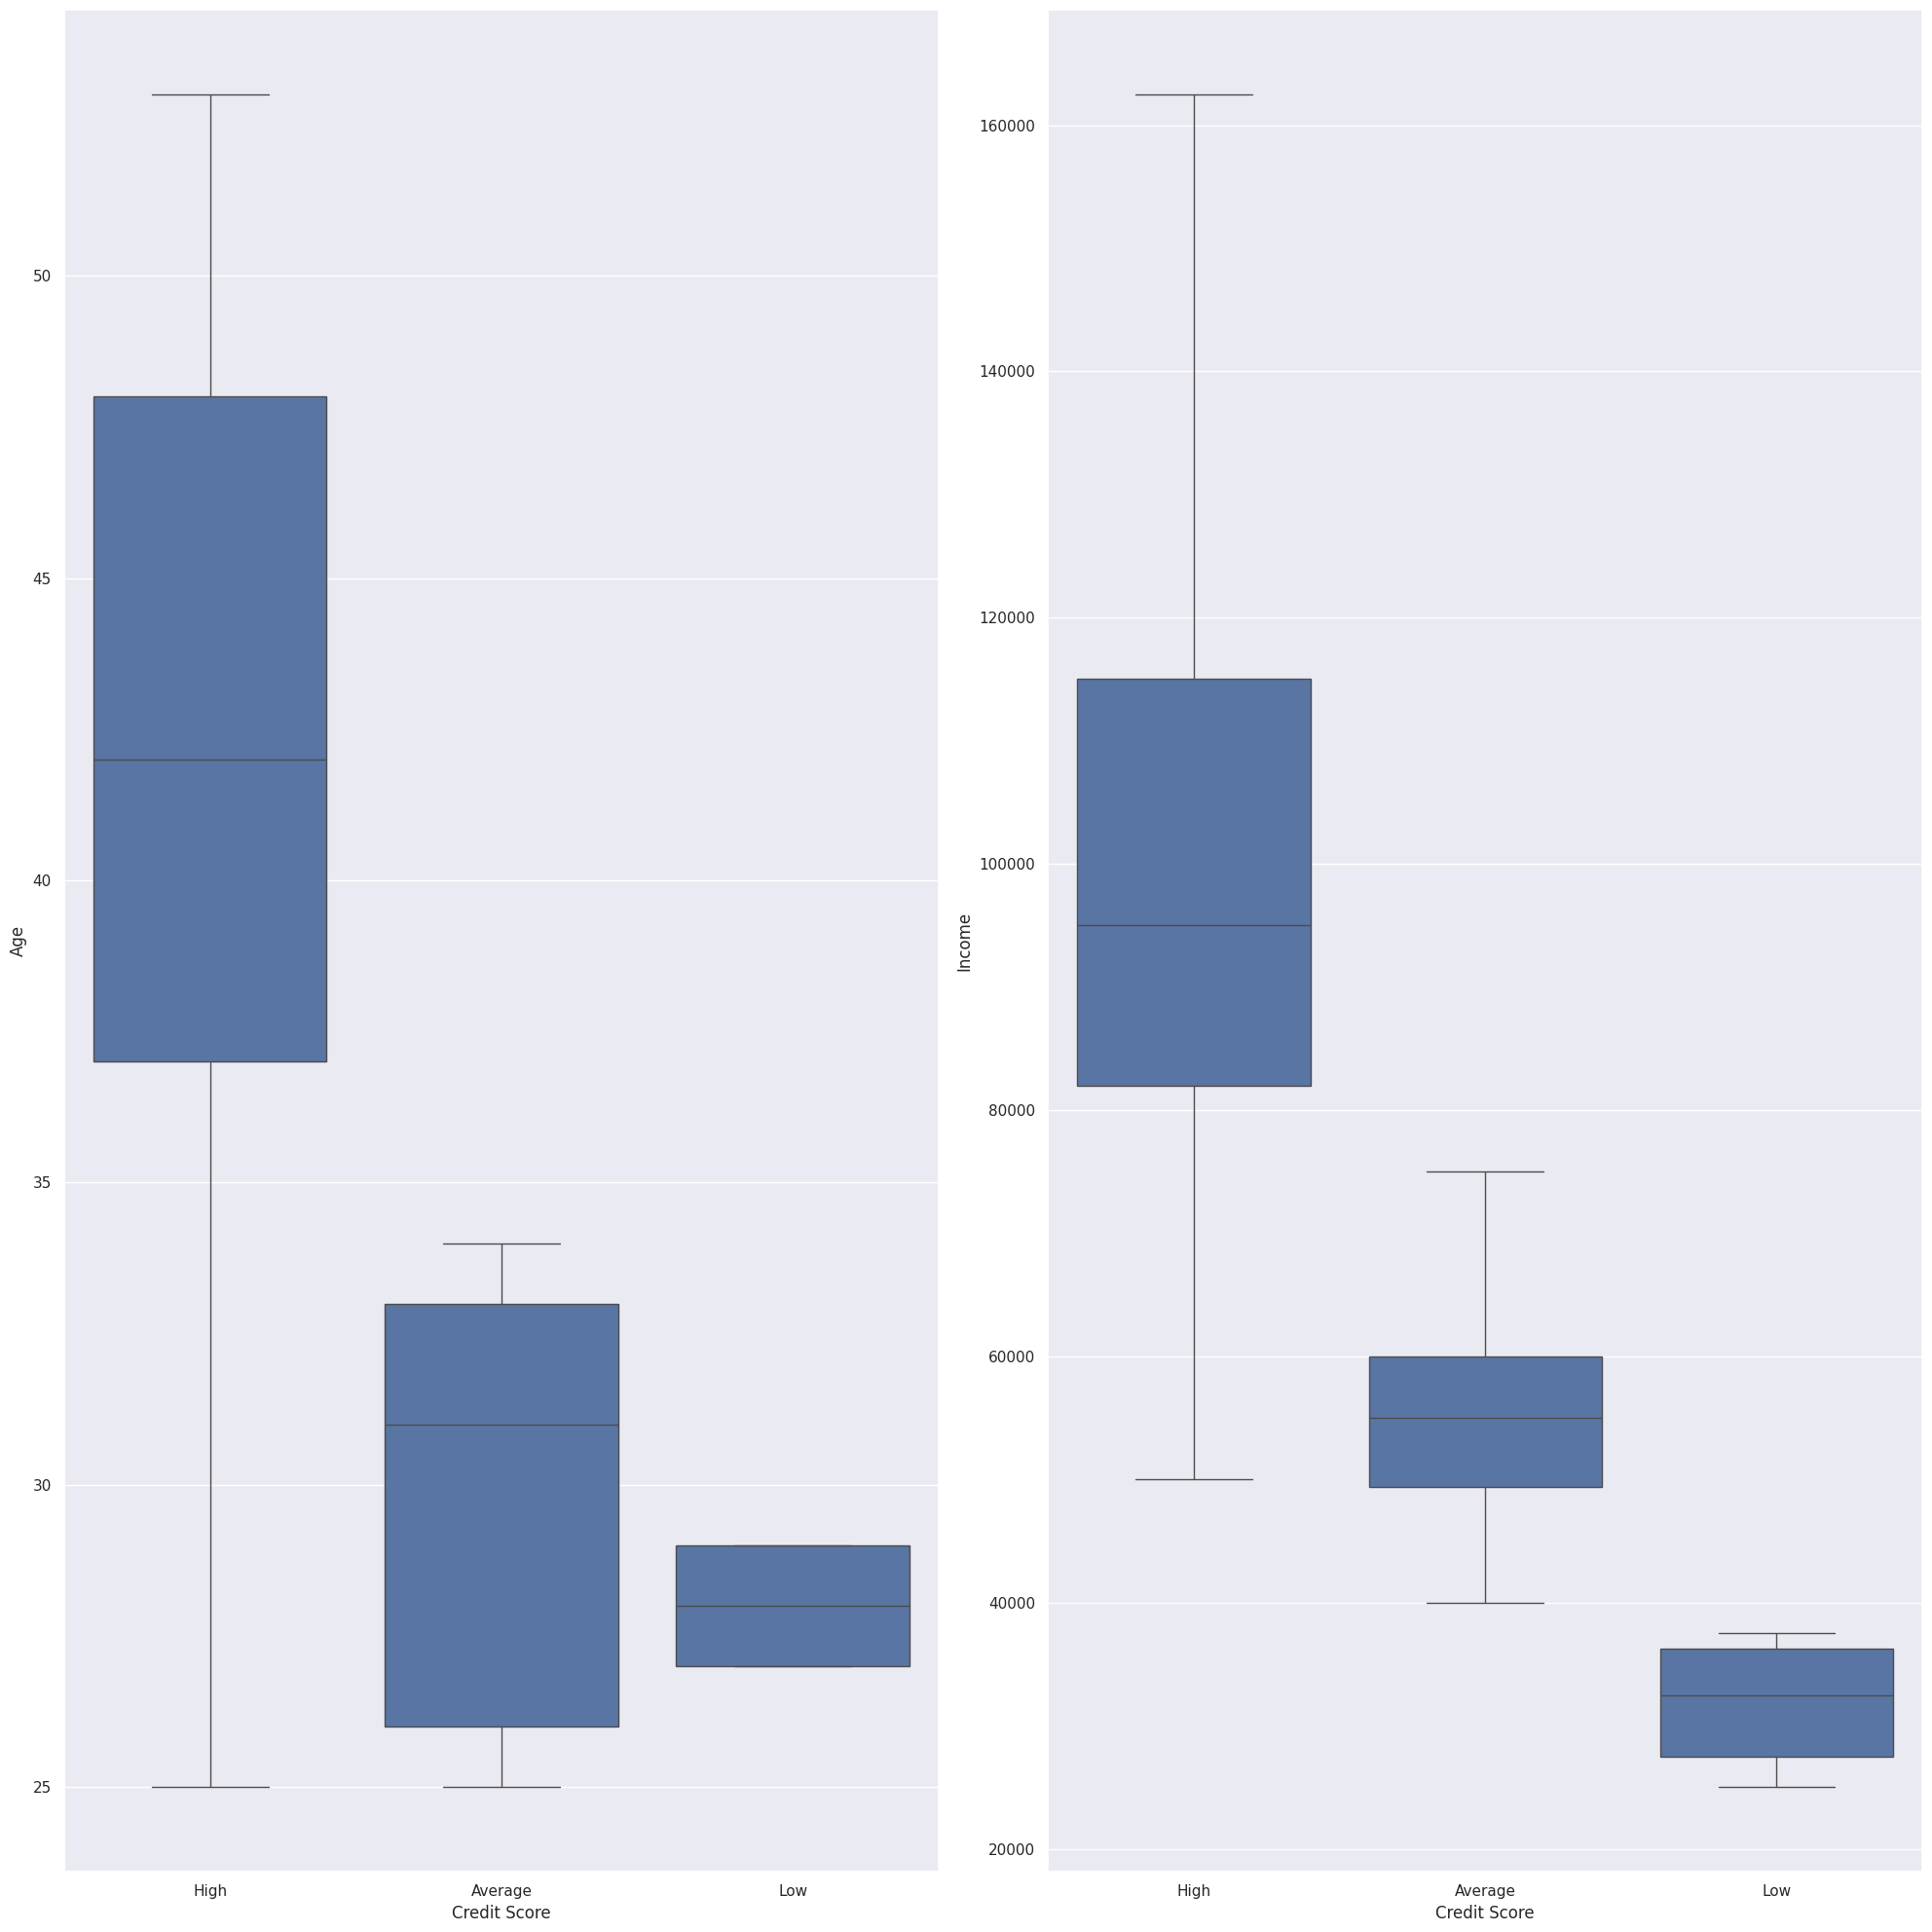

In [70]:

num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Credit Score', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

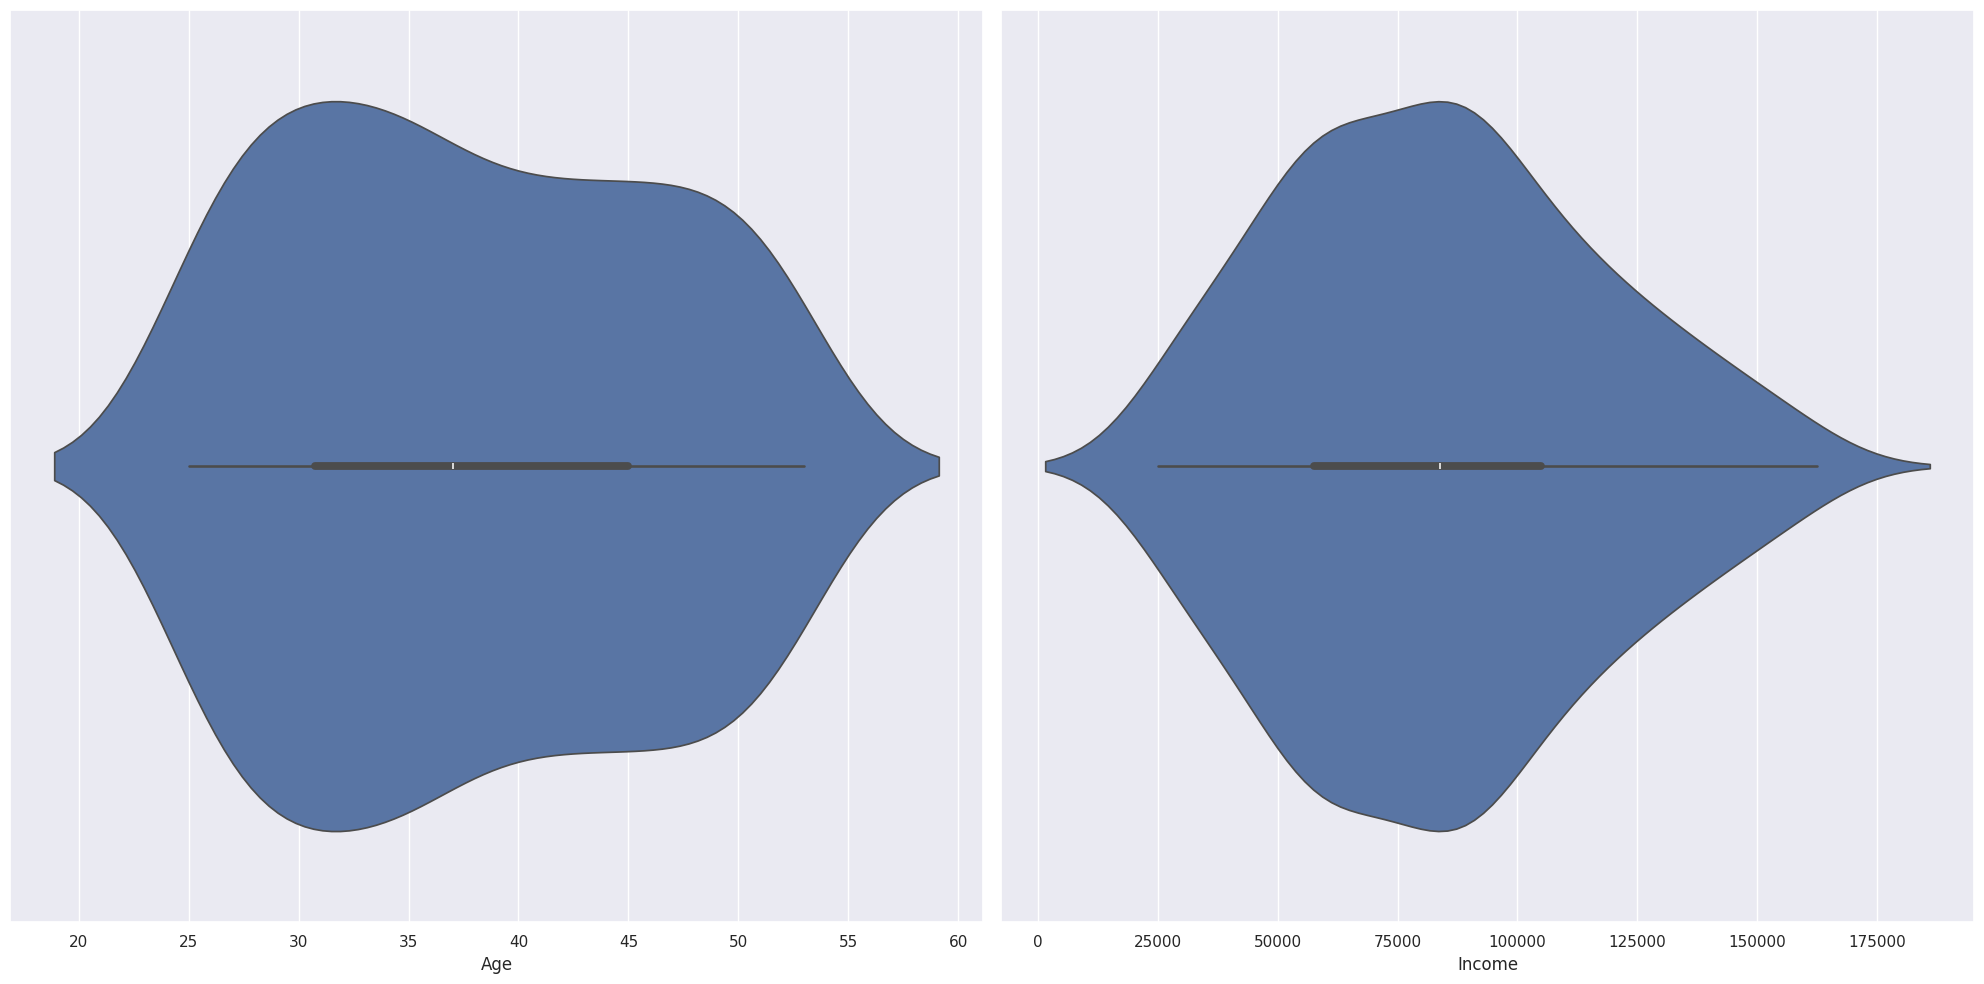

In [71]:
num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()



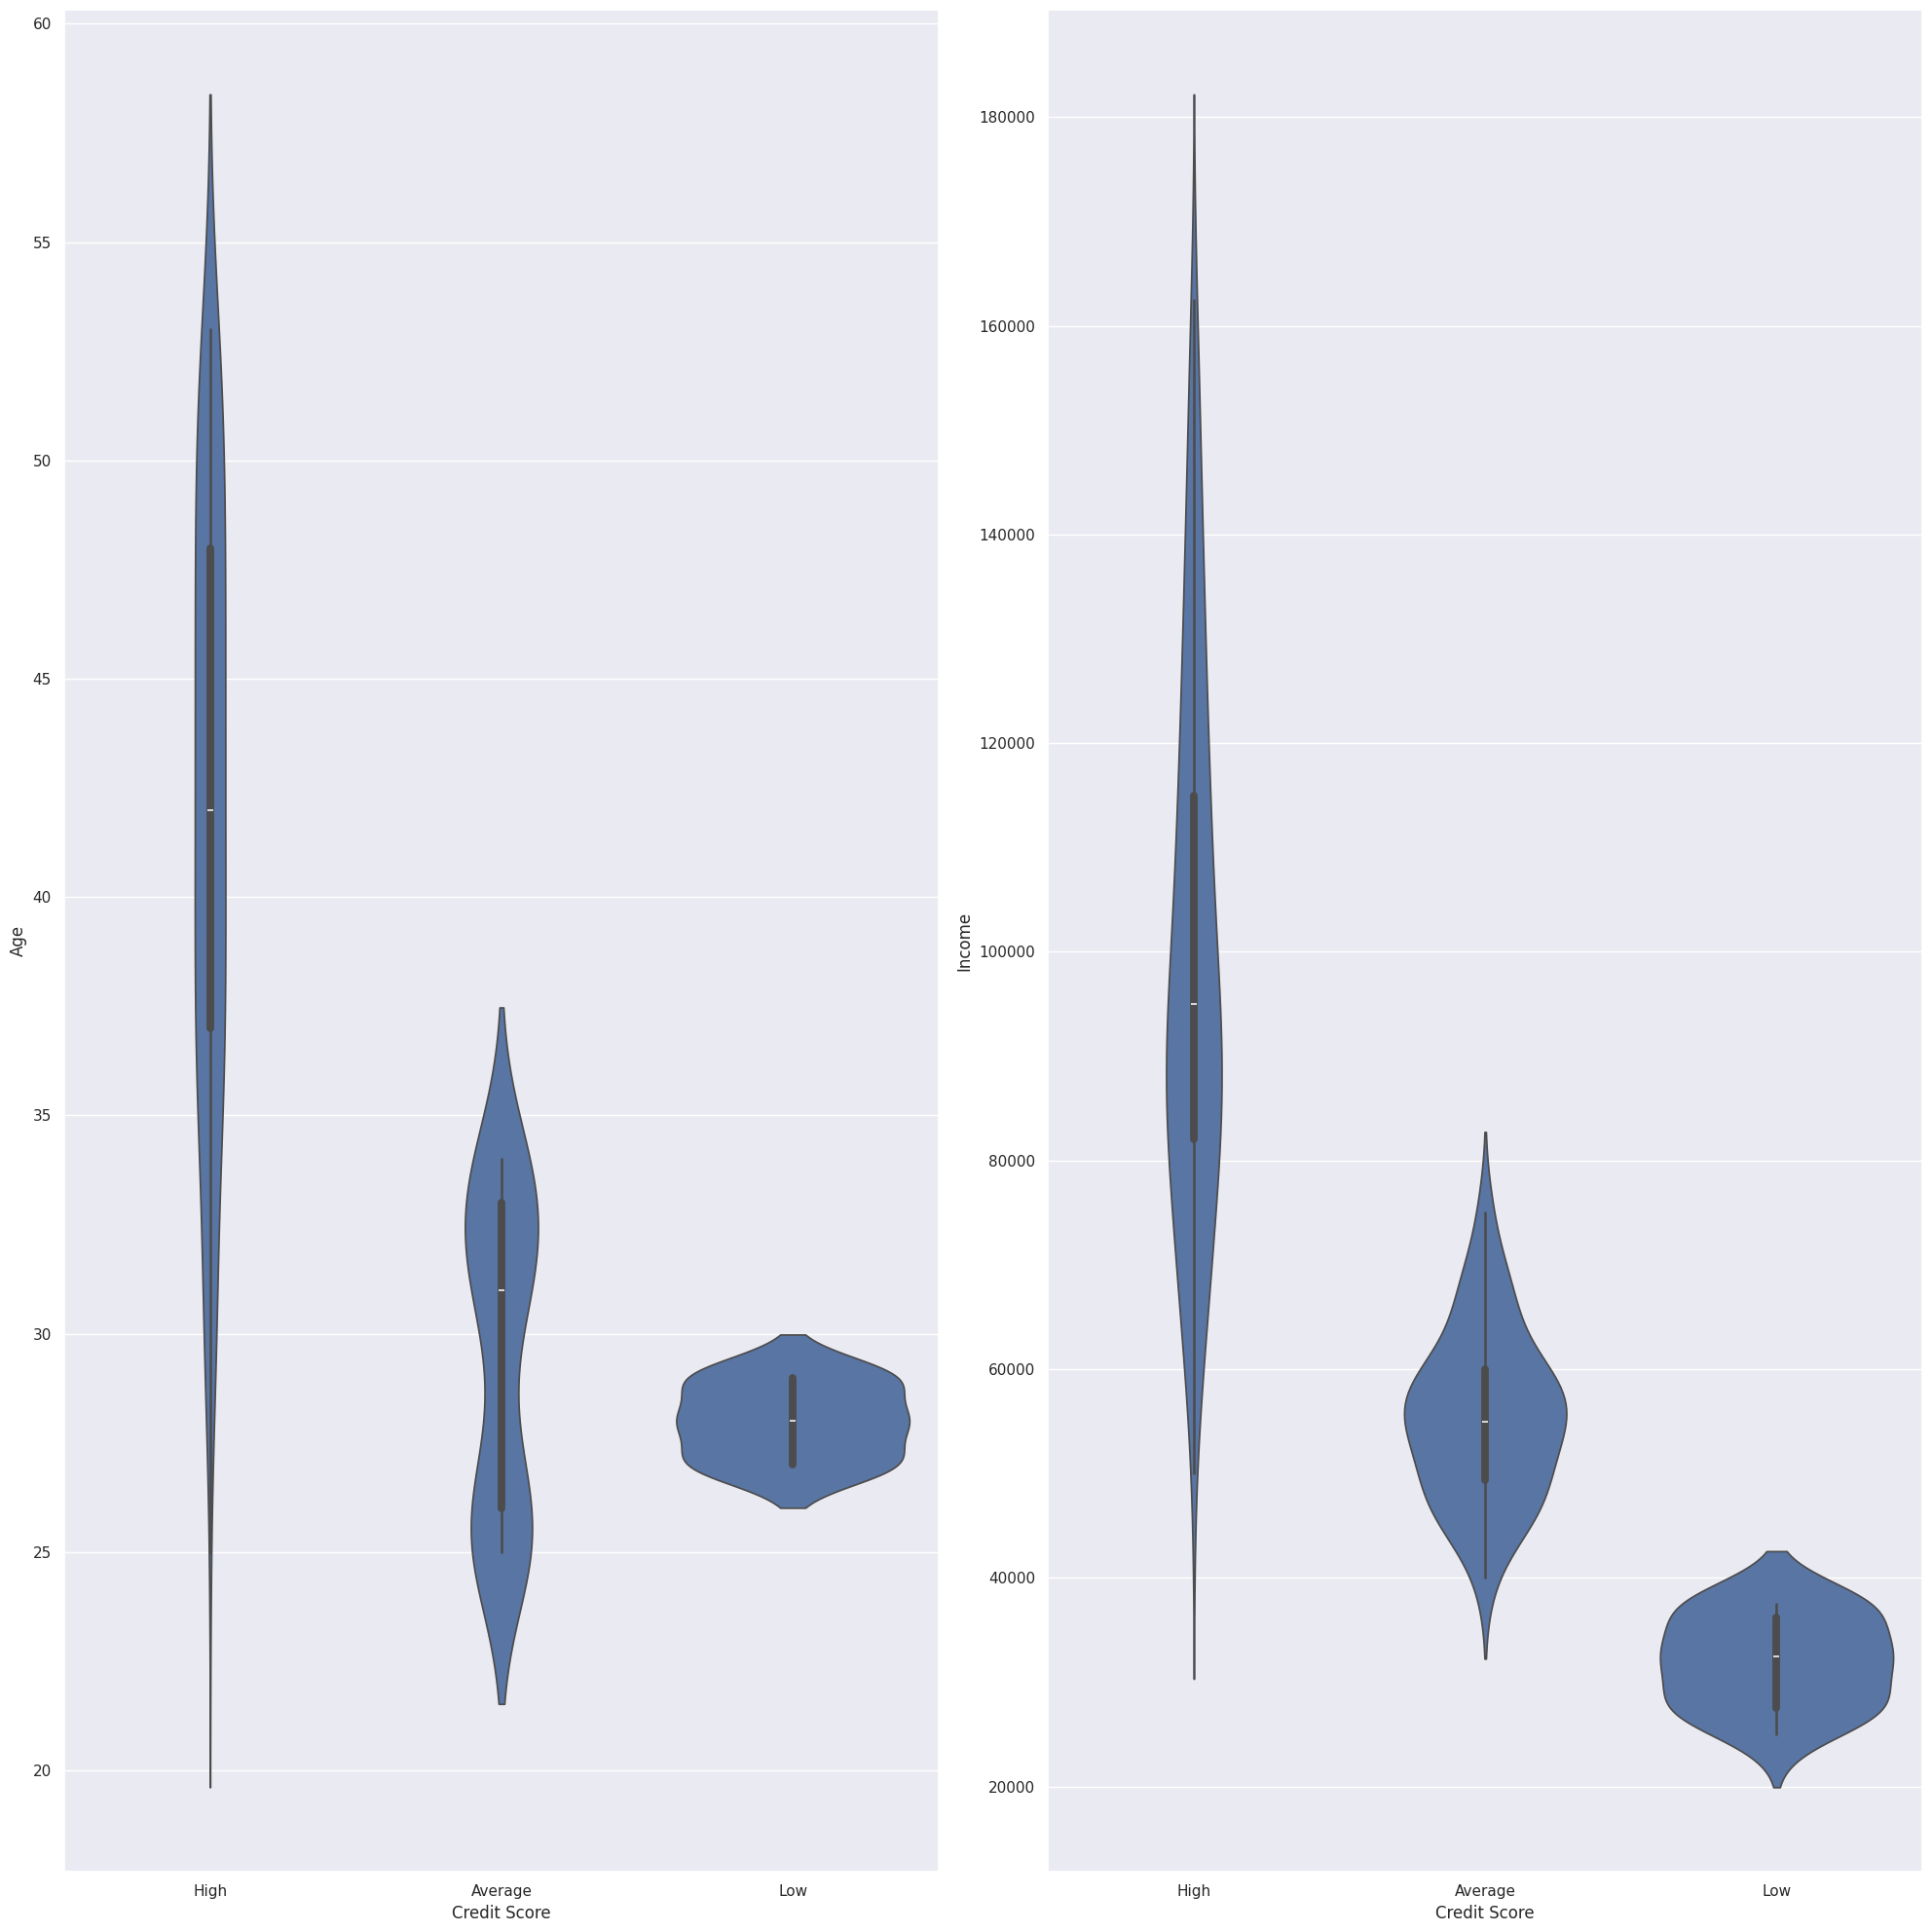

In [72]:
num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Credit Score', ax=axs[i])

fig.tight_layout()

plt.show()


In [73]:

#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

,0


In [74]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")



Gender: ['Female' 'Male']
Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Credit Score: ['High' 'Average' 'Low']


In [75]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")


Gender: [0 1]
Education: [1 4 2 3 0]
Marital Status: [1 0]
Home Ownership: [1 0]
Credit Score: [1 0 2]


<Axes: >

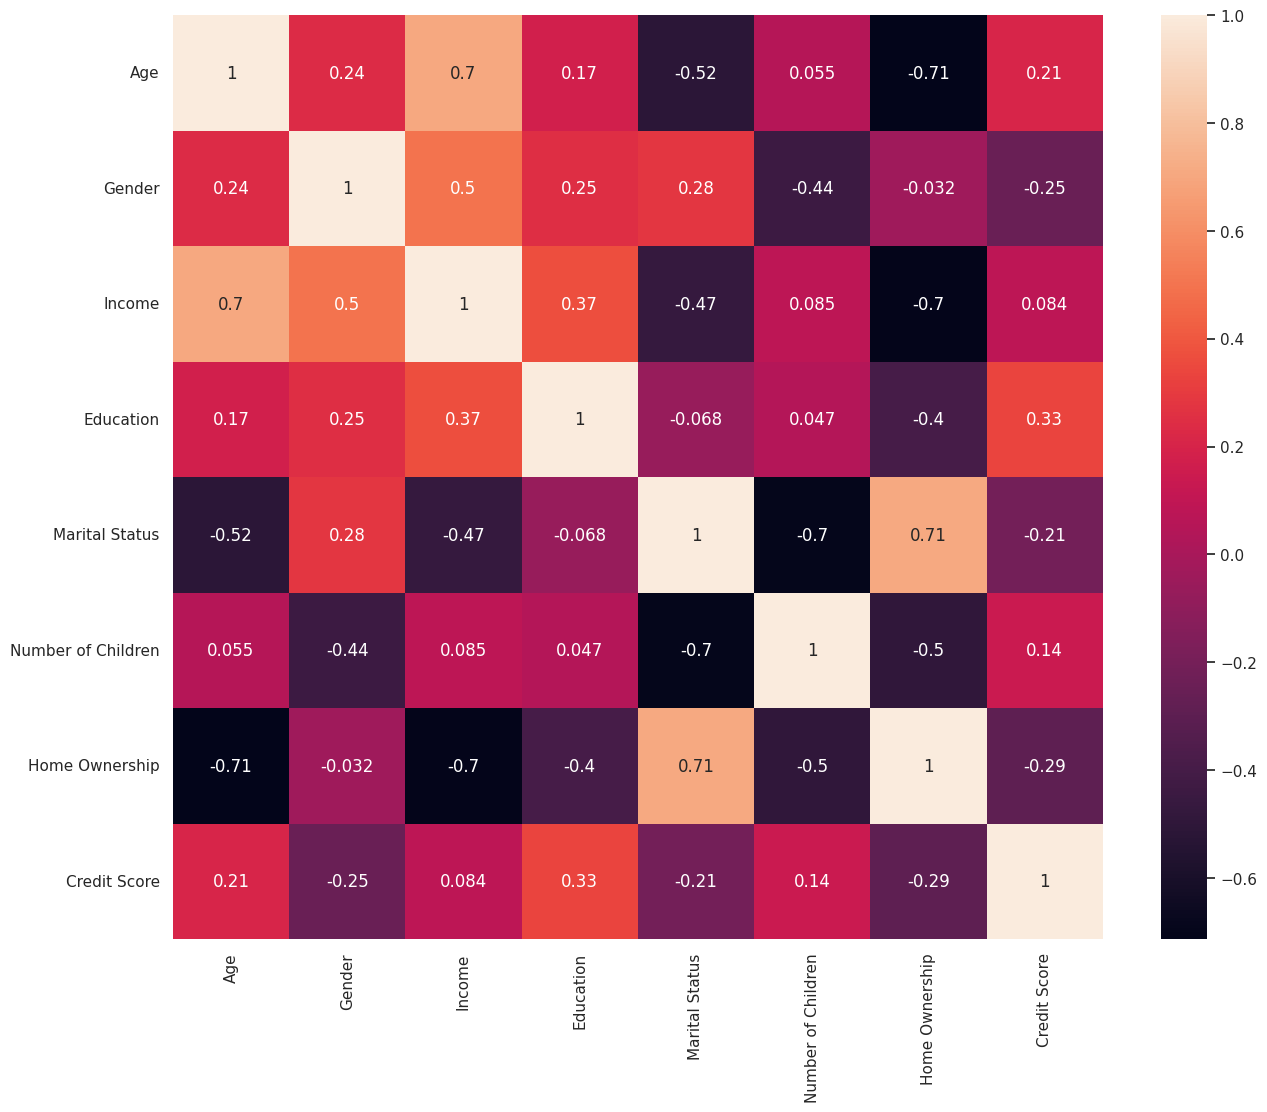

In [76]:

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)


In [77]:
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']


In [78]:


#test size 30% and train size 70%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

In [80]:
# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [81]:

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [82]:

from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")


Accuracy Score : 96.0 %


In [83]:


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.96
Precision Score :  0.96
Recall Score :  0.96
Jaccard Score :  0.9230769230769231


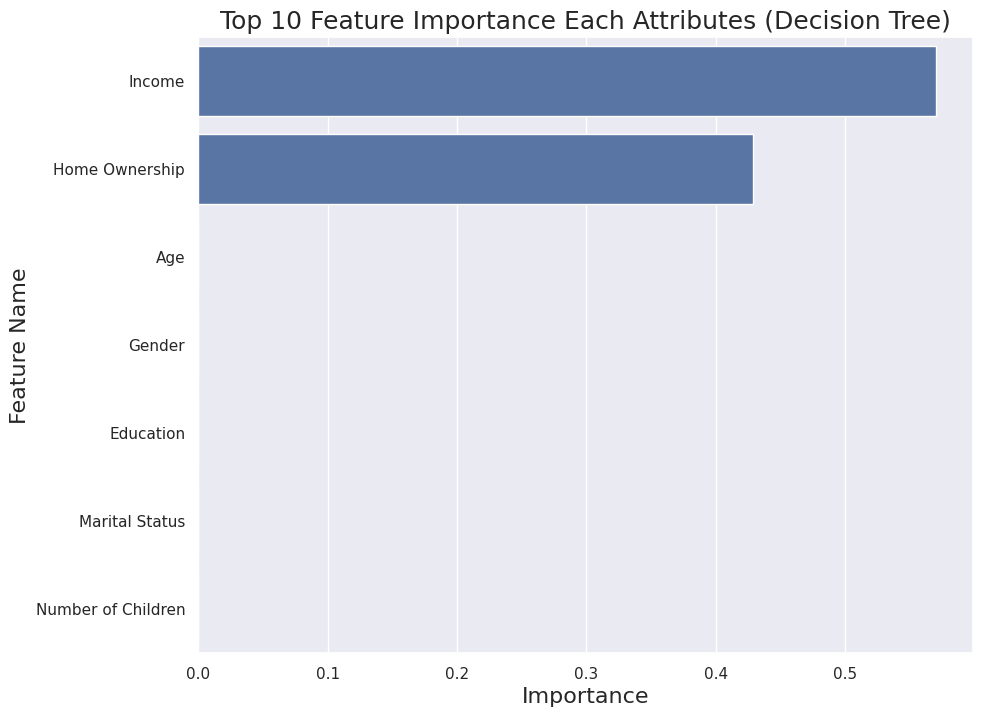

In [84]:


imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


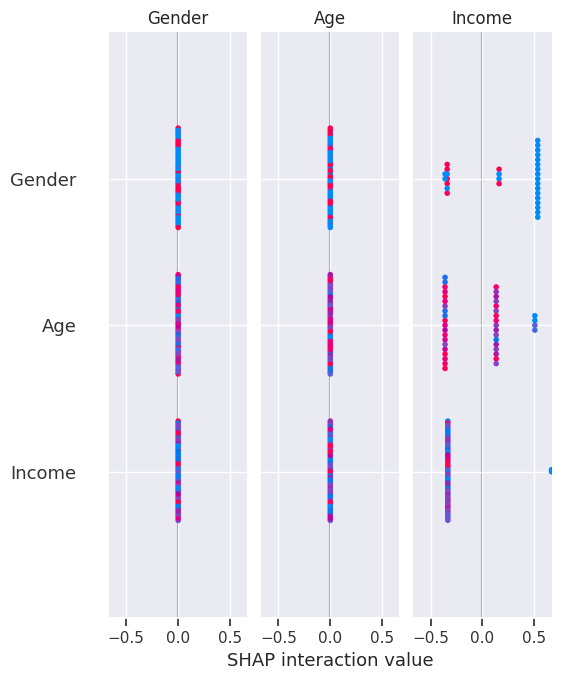

In [85]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.96')

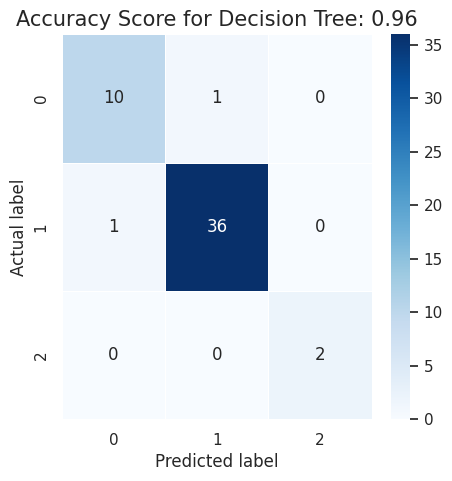

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


In [87]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 0}

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)


{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 0}


RandomForestClassifier(class_weight='balanced', random_state=0)

In [88]:


y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.0 %


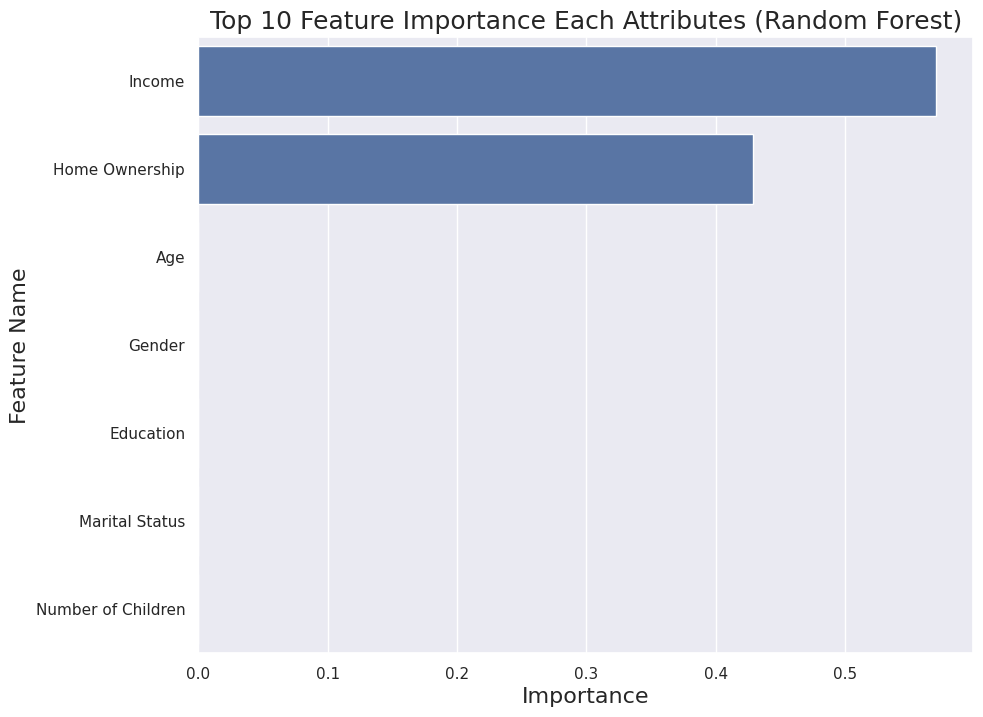

In [89]:


imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


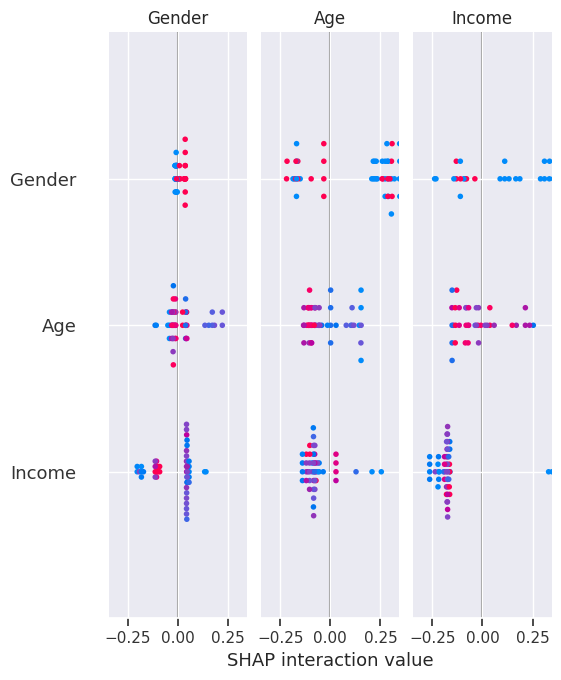

In [90]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.96')

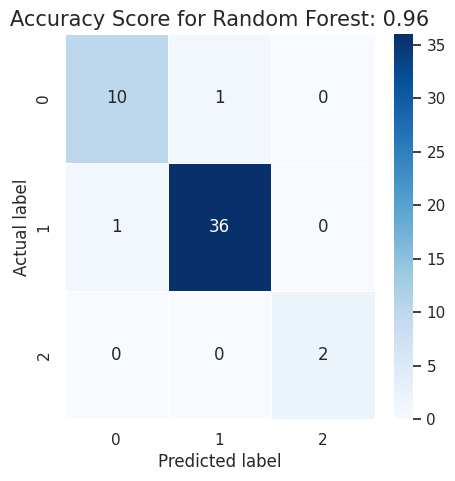

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)



In [92]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'C': 0.1}


In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, C=0.1, class_weight='balanced')
lr.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight='balanced', random_state=0)

In [94]:

y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")


Accuracy Score : 98.0 %


In [95]:


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))



F-1 Score :  0.98
Precision Score :  0.98
Recall Score :  0.98
Jaccard Score :  0.9607843137254902


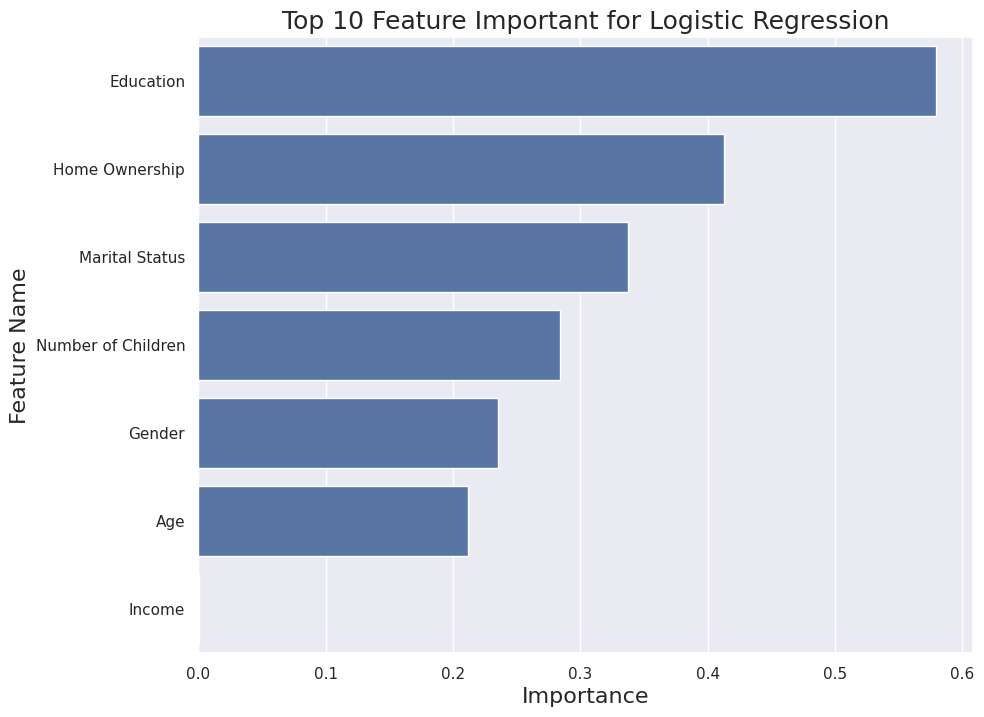

In [96]:


imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": abs(lr.coef_[0])
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Important for Logistic Regression', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()



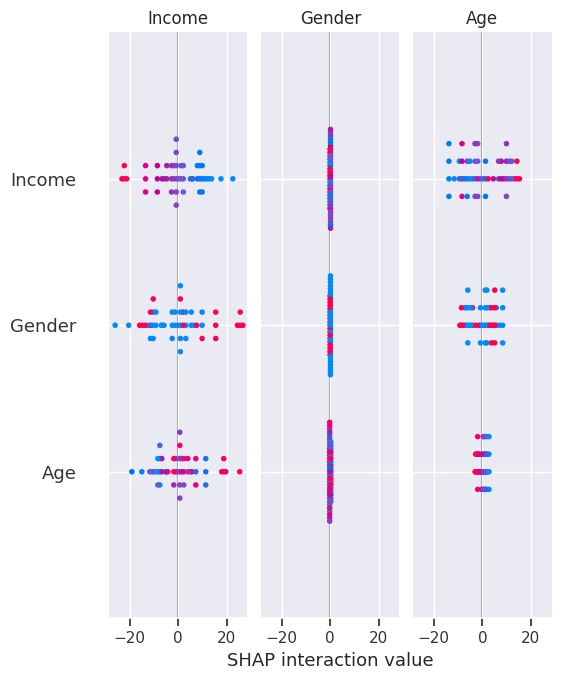

In [97]:
import shap
explainer = shap.LinearExplainer(lr, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.98')

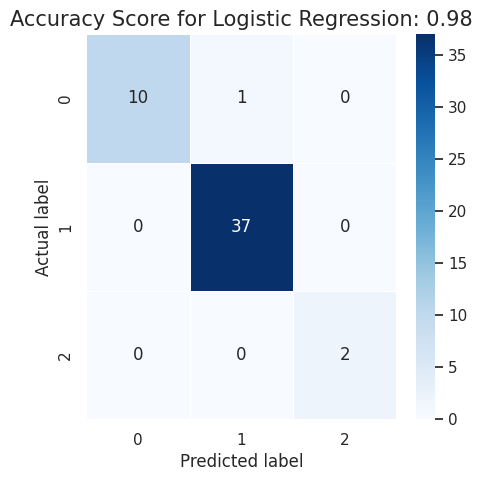

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)



In [99]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score

# Create a dictionary to store the performance metrics for each model
performance_metrics = {}

# Decision Tree performance
y_pred_dtree = dtree.predict(X_test)
performance_metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dtree),
    'F1-Score': f1_score(y_test, y_pred_dtree, average='micro'),
    'Precision': precision_score(y_test, y_pred_dtree, average='micro'),
    'Recall': recall_score(y_test, y_pred_dtree, average='micro'),
    'Jaccard Score': jaccard_score(y_test, y_pred_dtree, average='micro')
}

# Random Forest performance
y_pred_rfc = rfc.predict(X_test)
performance_metrics['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rfc),
    'F1-Score': f1_score(y_test, y_pred_rfc, average='micro'),
    'Precision': precision_score(y_test, y_pred_rfc, average='micro'),
    'Recall': recall_score(y_test, y_pred_rfc, average='micro'),
    'Jaccard Score': jaccard_score(y_test, y_pred_rfc, average='micro')
}

# Logistic Regression performance
y_pred_lr = lr.predict(X_test)
performance_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr, average='micro'),
    'Precision': precision_score(y_test, y_pred_lr, average='micro'),
    'Recall': recall_score(y_test, y_pred_lr, average='micro'),
    'Jaccard Score': jaccard_score(y_test, y_pred_lr, average='micro')
}

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:

#predictive system for Credit score
input_data = (50,1,150000,4,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardized the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction = lr.predict(input_data_reshaped)
print(prediction)

if(prediction == 0):
    print("Average credit score")
elif(prediction == 1):
    print("High credit score")
elif(prediction == 2):
    print("Low credit score")

[[ 1.39198481  0.9655068   1.95592542  1.4237305  -1.05409255 -0.63457432
  -0.73521462]]
[1]
High credit score
